<a href="https://colab.research.google.com/github/vladke95/Job_test/blob/main/Rb_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

# Plot constants and colors
BAR_COLOR  = '#e66707'
BAR_COLOR2 = '#a32c1a'
BAR_COLOR3 = '#309e15'
TICK_COLOR = '#000000'
TITLE_FONT_SIZE= 16
LABEL_FONT_SIZE= 14
################################

# Training and testing data loading
# I loaded data from google drive, also my data is modified, not original.

train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/RB/Retail_data.csv')
test_df  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/RB/Potential_Customers.csv')
train_and_test = [train_df,test_df]

train_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CUST_INCOME_2ND_PART,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR,CURRENT_BALANCE_EUR_2ND_PART
0,1,Y,50.0,52,13,M,HGH,PVE,M,909,5013077,1979-04-18,2010-01-01,2004-03-16,7648.0,350692.0
1,9,Y,48.0,49,11,M,HGH,SFE,M,288,4615385,1999-12-16,2004-01-20,2005-11-07,30189.0,90492.0
2,11,Y,53.0,55,14,M,BCR,STE,M,1280,528692,2005-06-28,1990-09-01,2003-06-25,50553.0,17454.0
3,12,Y,64.0,66,10,M,BCR,OTH,F,620,9597692,2000-12-22,9999-10-01,2006-12-21,15907.0,28338.0
4,18,Y,46.0,47,9,S,MAS,PVE,F,2239,853846,2009-08-01,2013-12-24,2007-08-07,27916.0,19262.0


We are going to discuss each feature to see how should they affect Mortgage and what to expect while analysing results that model gave.


Cocunut is some sort of ID. It doesn't affect Mortgage.

Age at which person take Morgage should replace current Age for people who took Morgage. And then Age at origination will not be considered and modified Age will.

Years with bank, Martial status, Education, Employment, Gender, Customer income and Current balance should all have correlation with Mortgage, some with stronger, some with weaker correlation.

For Address, Job and Bank Date we are going to extract only year and check correlation.


In [35]:
# @title/
# Data formating

train_df['Mortgage_YN'] = train_df['Mortgage_YN'].map( {'N': 0, 'Y': 1} ).astype(int)

mort_y_n = train_df['Mortgage_YN'].value_counts()[1]
for i in range(mort_y_n):
    train_df.loc[i, 'AGE'] = int(train_df['AGE_AT_ORIGINATION'][i])

train_df  = train_df.drop(['AGE_AT_ORIGINATION'], axis=1)

train_df.head()

,Cocunut,Mortgage_YN,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CUST_INCOME_2ND_PART,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR,CURRENT_BALANCE_EUR_2ND_PART
0,1,1,50,13,M,HGH,PVE,M,909,5013077,1979-04-18,2010-01-01,2004-03-16,7648.0,350692.0
1,9,1,48,11,M,HGH,SFE,M,288,4615385,1999-12-16,2004-01-20,2005-11-07,30189.0,90492.0
2,11,1,53,14,M,BCR,STE,M,1280,528692,2005-06-28,1990-09-01,2003-06-25,50553.0,17454.0
3,12,1,64,10,M,BCR,OTH,F,620,9597692,2000-12-22,9999-10-01,2006-12-21,15907.0,28338.0
4,18,1,46,9,S,MAS,PVE,F,2239,853846,2009-08-01,2013-12-24,2007-08-07,27916.0,19262.0


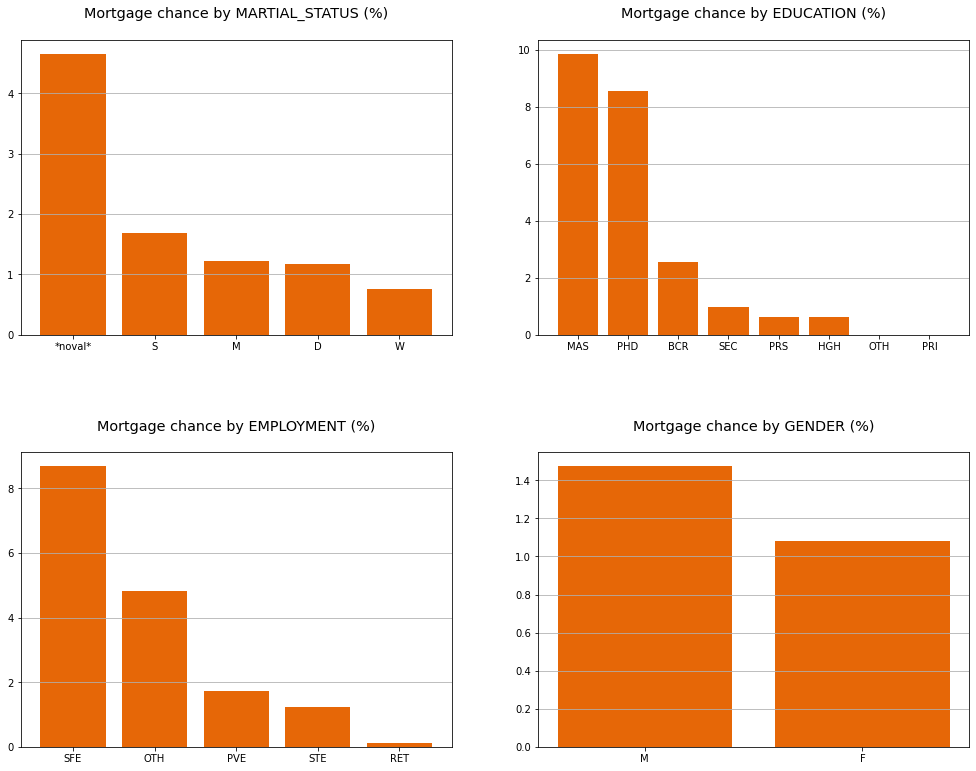

In [57]:

plt.figure(figsize=(17, 13))
plt.subplots_adjust(hspace = 0.4)
k=221
for ftr in ['MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT', 'GENDER']:
    tmp = train_df[[ftr, 'Mortgage_YN']].groupby([ftr], as_index=False).mean().sort_values(by='Mortgage_YN', ascending=False)
    plt.subplot(k)
    k+=1
    plt.bar(tmp[ftr],tmp['Mortgage_YN']*100, color=BAR_COLOR)
    plt.title("Mortgage chance by " + ftr + " (%)\n", fontsize=TITLE_FONT_SIZE*0.9, color=TICK_COLOR)
    plt.grid(axis='y')

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23983 entries, 0 to 23982
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cocunut                       23983 non-null  int64  
 1   Mortgage_YN                   23983 non-null  int64  
 2   AGE                           23983 non-null  int64  
 3   YEARS_WITH_BANK               23983 non-null  int64  
 4   MARTIAL_STATUS                23983 non-null  object 
 5   EDUCATION                     23983 non-null  object 
 6   EMPLOYMENT                    23983 non-null  object 
 7   GENDER                        23983 non-null  object 
 8   CUST_INCOME                   23983 non-null  int64  
 9   CUST_INCOME_2ND_PART          23983 non-null  object 
 10  CURRENT_ADDRESS_DATE          23983 non-null  object 
 11  CURRENT_JOB_DATE              23983 non-null  object 
 12  CURRENT_WITH_BANK_DATE        23983 non-null  object 
 13  C

In [40]:
train_df['EDUCATION'].value_counts()

HGH    15987
BCR     6629
PRS      633
SEC      416
MAS      193
PHD      117
PRI        6
OTH        2
Name: EDUCATION, dtype: int64